In [1]:
import pandas as pd
from datetime import *
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [2]:
TweetsSentiment= pd.read_csv('TweetSentiment.csv', low_memory=False)
Sentiment_price=pd.read_csv('sentiment_price.csv', low_memory=False)


In [3]:
#Drop unnamed column, comnvert date fields into datetime
TweetsSentiment= TweetsSentiment.drop(['Unnamed: 0',],axis=1)
Sentiment_price= Sentiment_price.drop(['Unnamed: 0',],axis=1)
TweetsSentiment['date']= pd.to_datetime(TweetsSentiment['date'])
Sentiment_price['date']= pd.to_datetime(Sentiment_price['date'])

In [4]:
#creating a conditions and values that will need to be met for new column in datafame
conditions = [
    (Sentiment_price['Open_to_Close']>0),
    (Sentiment_price['Open_to_Close']<0) ]
values = ['Positive', 'negative']

In [5]:
#using the conditions an values from previous labels each row based on criteria specified in condition 
Sentiment_price['Price_movement'] = np.select(conditions, values)

In [6]:
#like previous cells
conditions1 = [
    (TweetsSentiment['sentiment']>0),
    (TweetsSentiment['sentiment']<0) ]
values2 = ['Positive', 'negative']

In [7]:
TweetsSentiment['Positive_negative_Sentiment'] = np.select(conditions1, values2)

In [8]:
#Sort tweets based on sentiment 
SortedTweets = TweetsSentiment.sort_values(by=('sentiment'))

In [9]:
SortedTweets.tail()

,date,text,user_location,user_description,user_followers,user_friends,user_verified,year,sentiment,Positive_negative_Sentiment
13026,2021-07-02,@PathFund @XTexchange This is a great and exce...,NaN,i am a student,12.0,613.0,False,2021,0.9895,Positive
13261,2021-07-02,@PathFund @XTexchange This is a great and exce...,NaN,NaN,20.0,408.0,False,2021,0.9895,Positive
48956,2021-08-18,@CornDeFi This is a great and excellent projec...,Rong pur,যারা আমাকে ফলো দিবে আমিও তাকে ফলো দিবো। প্লিজ ...,192.0,557.0,False,2021,0.9898,Positive
93776,2021-11-25,I’m thankful for everyone that follows me. \n...,"Huntington Beach, CA",#Bitcoin I am one with love and abundance. (I...,135.0,836.0,False,2021,0.9901,Positive
32850,2021-07-28,@News1Lead @cryptocom Wow great news! Congratu...,NaN,"Butter! OT7, forever! 💜💜💜",82.0,132.0,False,2021,0.9921,Positive


In [10]:
SortedTweets.to_csv('Sorted.csv')

In [11]:
#Average Sentiment by month 
SentimentByMonth=TweetsSentiment['sentiment'].groupby([TweetsSentiment['date'].dt.strftime("%m")]).mean()

In [12]:
#bitcoin monthly high 
Month_high= Sentiment_price['High'].groupby([Sentiment_price['date'].dt.strftime("%m")]).max()

In [13]:
#number of Tweets by month 
TweetMonth = TweetsSentiment['text'].groupby([TweetsSentiment['date'].dt.strftime("%m")]).count()


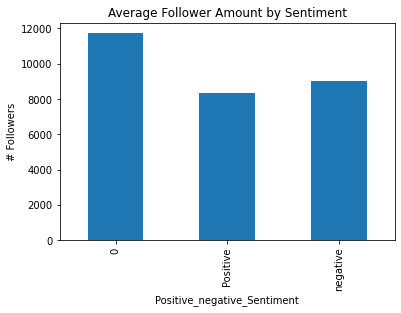

In [9]:
#The average number of followers by Sentiment 
FollowerCountSentiment1= TweetsSentiment['user_followers'].groupby([TweetsSentiment['Positive_negative_Sentiment']]).mean()

FollowerCountSentiment = FollowerCountSentiment1.plot.bar(stacked=False)
FollowerCountSentiment.set_ylabel('# Followers')
FollowerCountSentiment.set_title("Average Follower Amount by Sentiment")

plt.savefig("follower_account_sentiment.jpg")


In [10]:
FollowerCountSentiment1

Positive_negative_Sentiment
0           11740.874260
Positive     8345.798014
negative     9007.977250
Name: user_followers, dtype: float64

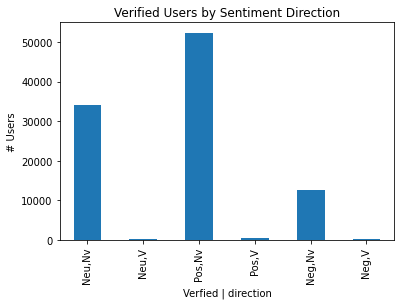

In [167]:
#view verified user status and sentiment direction
userStatus = TweetsSentiment['user_verified'].groupby([TweetsSentiment['Positive_negative_Sentiment'],TweetsSentiment['user_verified']]).count()
labels = ['Neu,Nv', 'Neu,V', 'Pos,Nv', 'Pos,V', 'Neg,Nv', 'Neg,V']
UserStatusChart = userStatus.plot.bar(stacked=False)
UserStatusChart.set_ylabel('# Users')
UserStatusChart.set_xticklabels(labels)
UserStatusChart.set_xlabel('Verfied | direction')
UserStatusChart.set_title("Verified Users by Sentiment Direction")
plt.savefig('verifiedSentiment.jpg')

In [163]:
userStatus

Positive_negative_Sentiment  user_verified
0                            False            34186
                             True               282
Positive                     False            52345
                             True               416
negative                     False            12614
                             True               133
Name: user_verified, dtype: int64

In [14]:
#average sentiment based on positve or negative days
OpenCloseSentiment= Sentiment_price['sentiment'].groupby([Sentiment_price['Price_movement']]).mean()
OpenCloseSentiment

Price_movement
Positive    0.265349
negative    0.250823
Name: sentiment, dtype: float64

In [15]:
#average decrease in price on days where we close lower than opening 
PriceOpenClose= Sentiment_price['Open_to_Close'].groupby([Sentiment_price['Price_movement']]).mean()
PriceOpenClose

Price_movement
Positive    1301.900318
negative   -1845.069687
Name: Open_to_Close, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


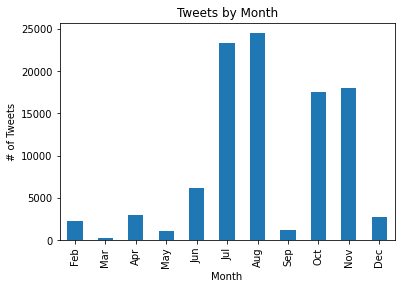

In [130]:
Monthplot = TweetMonth.plot.bar(stacked=False)
labels = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct', 'Nov', 'Dec']
Monthplot.set_ylabel('# of Tweets')
Monthplot.set_xlabel('Month')
Monthplot.set_title("Tweets by Month")

Monthplot.set_xticklabels(labels)

print(Monthplot)
plt.savefig('MonthPlot.jpg')

In [ ]:
TweetMonth 

date
02     2274
03      212
04     2949
05     1085
06     6174
07    23340
08    24493
09     1186
10    17559
11    17952
12     2752
Name: text, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


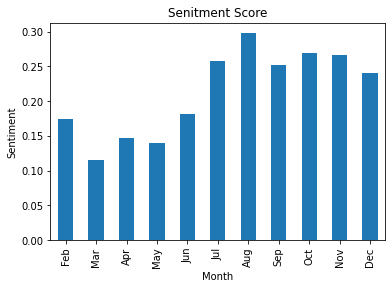

In [147]:
SentimentPlot = SentimentByMonth.plot.bar(stacked=False)
labels = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct', 'Nov', 'Dec']
SentimentPlot.set_ylabel('Sentiment')
SentimentPlot.set_xlabel('Month')
SentimentPlot.set_title("Senitment Score")

SentimentPlot.set_xticklabels(labels)

print(SentimentPlot)
plt.savefig('SentimentbyMonth.jpg')

In [ ]:
SentimentByMonth

date
02    0.173669
03    0.114711
04    0.147406
05    0.140149
06    0.181208
07    0.258503
08    0.297962
09    0.251943
10    0.269668
11    0.266094
12    0.240497
Name: sentiment, dtype: float64

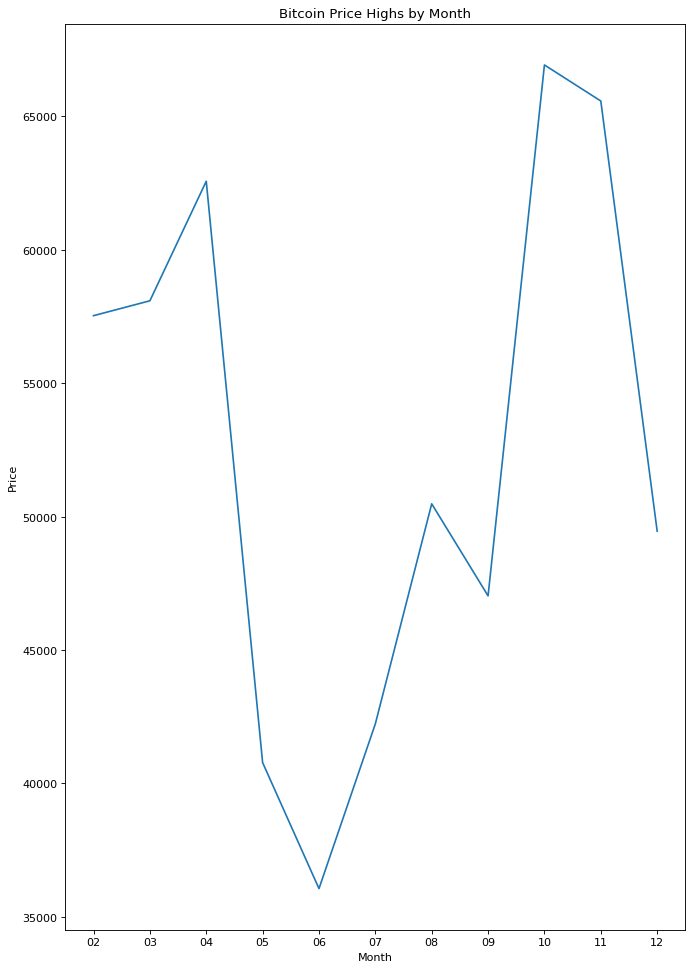

In [171]:
figure(figsize=(10, 15), dpi=80)
plt.plot(Month_high)
plt.ylabel('Price')
plt.xlabel('Month')
plt.title("Bitcoin Price Highs by Month")
plt.savefig("Price_by_Month")


In [72]:
Month_high

date
02    57533.390625
03    58091.062500
04    62572.175781
05    40782.078125
06    36059.484375
07    42235.546875
08    50482.078125
09    47031.742188
10    66930.390625
11    65579.015625
12    49458.210938
Name: High, dtype: float64